In [8]:
#
# Check the complexity of some of the sorting algorithms. 
#
# (1): Create lists of random values, then use Time() module to
#      calculate how long it takes for each sorting algorithm to sort
#      the lists.
#
# (2): These values will be saved in a .csv file. Read those values into a
#      dataframe. Since it's hard to determine miniscule differences when sorting 
#      small lists, start with a list of size 128 and use the time it takes to 
#      sort this list as your baseline. For example:
#
#       items = [128, 256, 512, 1028, ...] -> [1, 2, 4, 8]
#   
#       time = [.004, .008, .16, .32, ... ] -> [1, 2, 4, 8]
#
#      graphing the above lists (items x time) would be linear.
#
# (3): I also do a rough least-squares approximation, printing out the 
#      smallest difference between the y-values of the lines.
#

In [9]:
# include libraries 
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import math

In [2]:
# create baseline array
x = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

squared = []
log = []

for i in range(len(x)):
    squared.append(x[i] * x[i])
    log.append(x[i] * math.log(x[i], 2))

results = []

# create list with only .csv files 
files = os.listdir (".")
for f in files:
    if (re.search(r"csv", f)):
        results.append(f)

In [3]:
# rough form of least squares
def ls (s, l):
    count = 0
    
    for i in range(s.size):
        count = count + (s[i] - l[i])**2
        
    return count

In [4]:
# return kind of graph with smallest difference
def compare(s):
    names = ["linear", "n-squared", "n * log(n)"]
    fun = [x, squared, log]
    
    difference = ls(s, fun[0])
    index = 0
    
    for i in range(1, len(fun)):
        t = ls(s, fun[i])
        
        if (t < difference):
            difference = t
            index = i
        
    return names[index]

In [5]:
def approximate(i):
    
    sdf = pd.read_csv(results[i], sep=',')

    # add titles to the series, then convert objects to numbers
    items = pd.to_numeric(pd.Series([sdf.columns[0]]).append(sdf[sdf.columns[0]]))
    time = pd.to_numeric(pd.Series([sdf.columns[1]]).append(sdf[sdf.columns[1]]))

    time_base = time.iloc[0]
    item_base = items.iloc[0]

    # refactor time and items based on base (first) values
    for index in range(0, (time.size)):
        time.iloc[index] = (time.iloc[index] / time_base)
        items.iloc[index] = (items.iloc[index] / item_base)
    
    # create new dataframe
    named = pd.DataFrame({"Items":items,
                          "Time":time})
    
    # plot multiple graphs; green is linear, red is n*(log(n)), blue is x^2, yellow is current sort
    plt.plot(x, x, "g-", x, squared, "b-", x, log, "r-", named["Items"].values, named["Time"].values, "y--" )
    # adjust y axis
    plt.ylim(1, 8192)
    plt.title(results[i])
    plt.show()
    
    print compare(named["Time"].values)

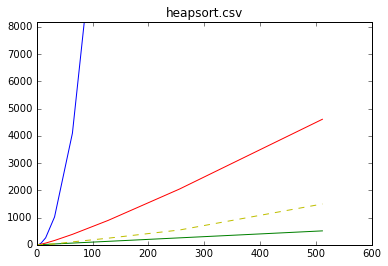

linear


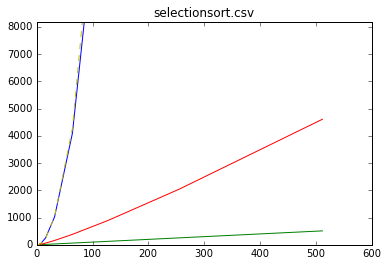

n-squared


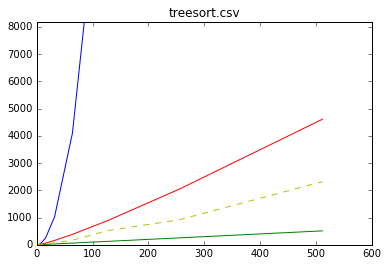

linear


In [6]:
for i in range(len(results)):
    approximate(i)